# Employee_Attrition_Prediction

# Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as mpl

# Importing DataSet

In [2]:
df = pd.read_csv('Human_Resources.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [4]:
df.shape

(1470, 35)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [7]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# Unique Values

### value_counts()

In [8]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [9]:
df.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [10]:
df.Department.value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [11]:
df.EducationField.value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [12]:
df.BusinessTravel.value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [13]:
# Finding Total unique values for Every cloumns

for col in list(df):
    print(col)
    print(df[col].unique())

Age
[41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
Attrition
['Yes' 'No']
BusinessTravel
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
DailyRate
[1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957  542  802 1355 1150 1329  959 1033 1316  364  438  689
  201 1427  857  933 1181 1395  662 1436  194  967 1496

In [14]:
# Finding Total unique values

for col in list(df):
    print(col, df[col].nunique())

Age 43
Attrition 2
BusinessTravel 3
DailyRate 886
Department 3
DistanceFromHome 29
Education 5
EducationField 6
EmployeeCount 1
EmployeeNumber 1470
EnvironmentSatisfaction 4
Gender 2
HourlyRate 71
JobInvolvement 4
JobLevel 5
JobRole 9
JobSatisfaction 4
MaritalStatus 3
MonthlyIncome 1349
MonthlyRate 1427
NumCompaniesWorked 10
Over18 1
OverTime 2
PercentSalaryHike 15
PerformanceRating 2
RelationshipSatisfaction 4
StandardHours 1
StockOptionLevel 4
TotalWorkingYears 40
TrainingTimesLastYear 7
WorkLifeBalance 4
YearsAtCompany 37
YearsInCurrentRole 19
YearsSinceLastPromotion 16
YearsWithCurrManager 18


# Missing Values

In [15]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

<AxesSubplot:>

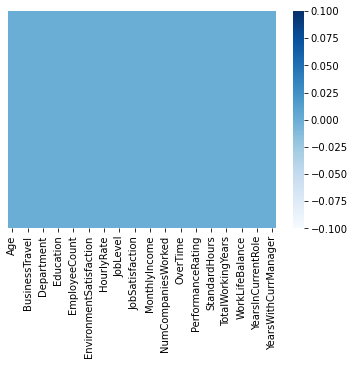

In [16]:
sb.heatmap(df.isnull(), cmap = 'Blues',yticklabels = False)

# Exploratory Data Analysis  (EDA)

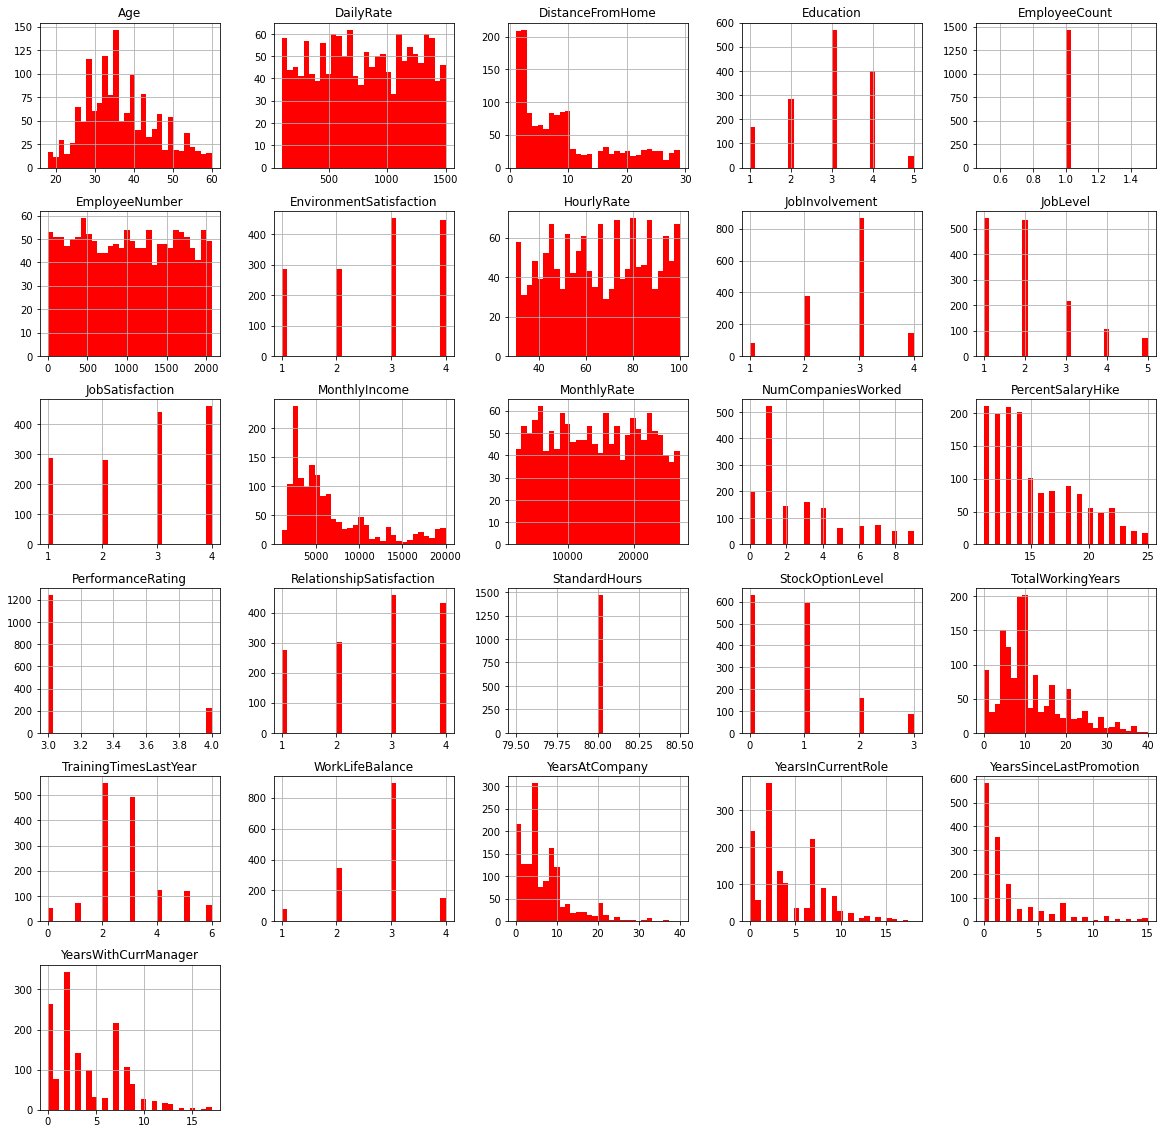

In [17]:
df.hist(bins=30, figsize = (20,20), color = 'r')
mpl.show()

# Dropping Unwanted Columns

In [18]:
df.drop(['EmployeeNumber','EmployeeCount','StandardHours','Over18'], axis=1, inplace=True)

In [19]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [20]:
df.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [21]:
left_df = df[df['Attrition'] == 'Yes']
stayed_df = df[df['Attrition'] == 'No']

In [22]:
left_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,4787.092827,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,3640.210367,...,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,1009.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,2373.000000,...,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,3202.000000,...,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,5916.000000,...,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19859.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [23]:
stayed_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,...,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,6832.739659,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,4818.208001,...,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1051.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,3211.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,5204.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,8834.000000,...,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


## Attrition using Count Plot

<AxesSubplot:xlabel='Attrition', ylabel='count'>

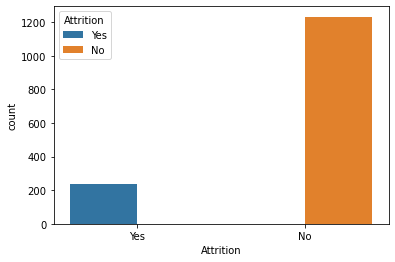

In [24]:
sb.countplot(x = 'Attrition',data = df,hue = 'Attrition')

### Attrition using Pie Chart

([<matplotlib.patches.Wedge at 0x1d8a58c4c40>,
 [Text(-1.0493363707830163, 0.5821453263163141, 'No'),
  Text(1.224225765913519, -0.6791695473690332, 'Yes')],
 [Text(-0.5246681853915082, 0.29107266315815705, '84%'),
  Text(0.6995575805220109, -0.3880968842108762, '16%')])

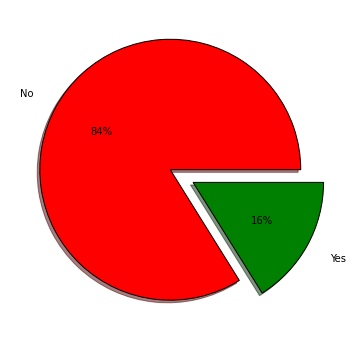

In [25]:
x = df.Attrition.value_counts()

mpl.figure(figsize=(6,6))

mpl.pie(x,labels = x.index,colors=['red', 'green'],
       wedgeprops={'edgecolor':'black'},
       autopct='%1.0f%%',
       explode=[0,0.2],
       labeldistance=1.2,
       shadow=True)

### "Attrition" with respect to "Age"

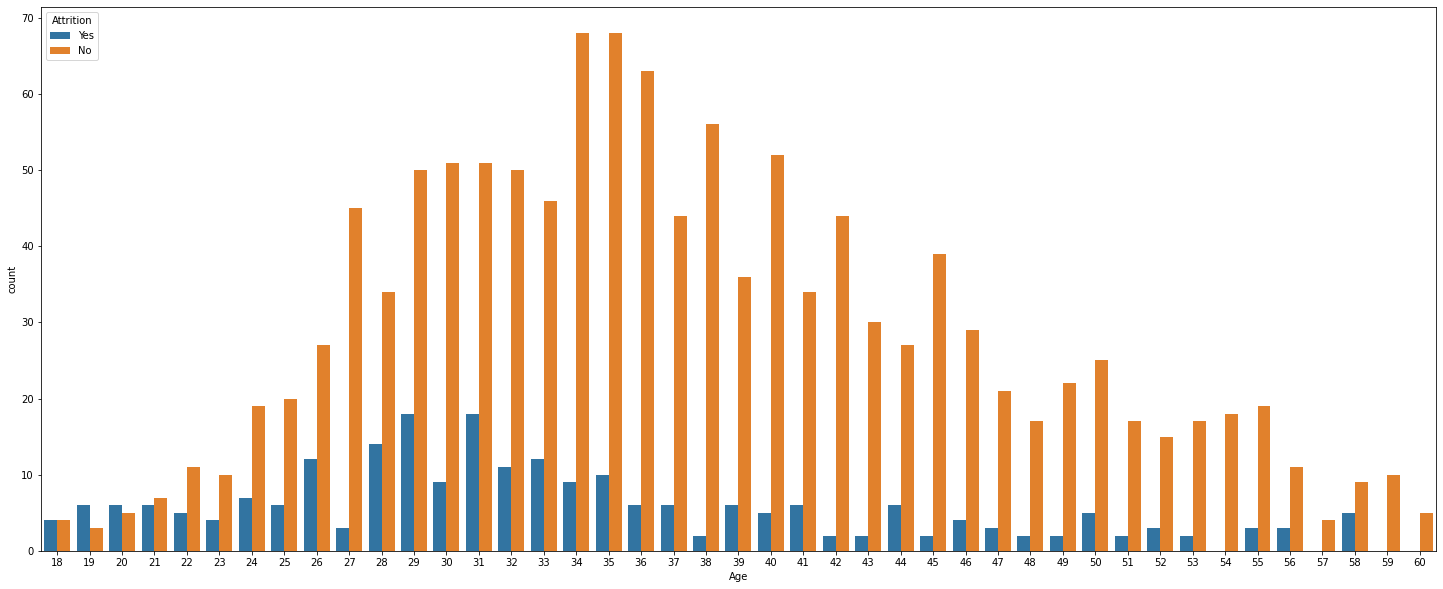

In [26]:
mpl.figure(figsize=(25,10))
sb.countplot(x='Age',data = df, hue='Attrition')
mpl.show()

### "Attrition" w.r.t "JobRole", "JobInvolvement", "JobLevel", and "MaritalStatus"

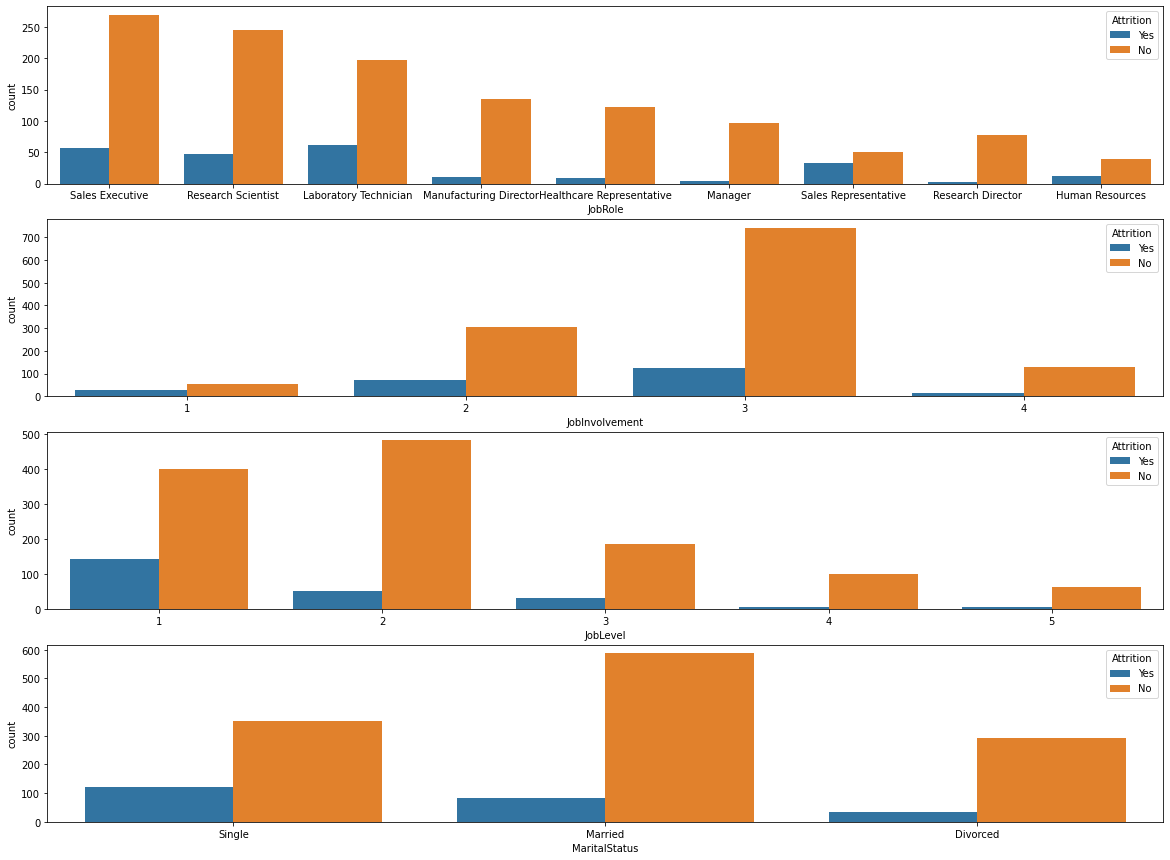

In [27]:
mpl.figure(figsize=(20,15))
mpl.subplot(411)
sb.countplot(x='JobRole',data = df,hue='Attrition')
mpl.subplot(412)
sb.countplot(x='JobInvolvement',data = df,hue='Attrition')
mpl.subplot(413)
sb.countplot(x='JobLevel',data = df,hue='Attrition')
mpl.subplot(414)
sb.countplot(x='MaritalStatus',data = df,hue='Attrition')

mpl.show()

### KDE Plots on left and stayed employess w.r.t "DistanceFromHome"

Text(0.5, 0, 'Distance From Home')

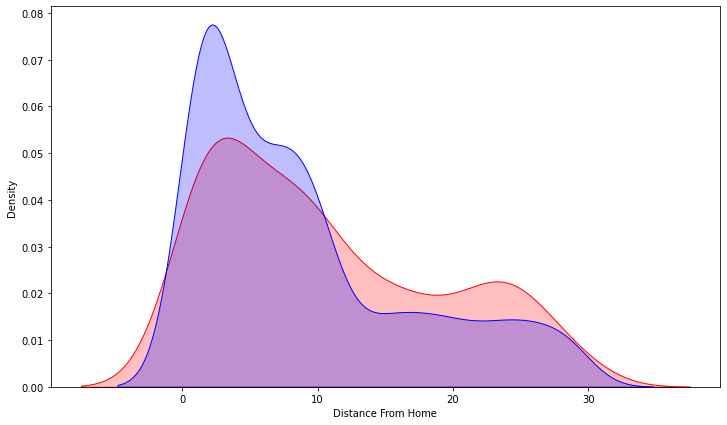

In [28]:
mpl.figure(figsize=(12,7))

sb.kdeplot(left_df['DistanceFromHome'], label='Employees who left',color='r', shade=True)
sb.kdeplot(stayed_df['DistanceFromHome'], label='Employees who stayed',color='b', shade=True)

mpl.xlabel('Distance From Home')

### KDE Plots on left and stayed employess w.r.t "TotalWorkingYears"

Text(0.5, 0, 'Total Working Years')

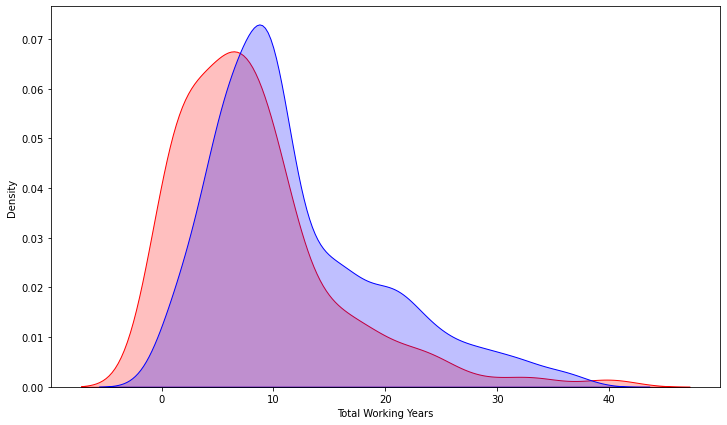

In [29]:
mpl.figure(figsize=(12,7))

sb.kdeplot(left_df['TotalWorkingYears'], label='Employees who left',color='r', shade=True)
sb.kdeplot(stayed_df['TotalWorkingYears'], label='Employees who stayed',color='b', shade=True)

mpl.xlabel('Total Working Years')

### Boxplot to compare salary difference b/w Male and Female

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Gender'>

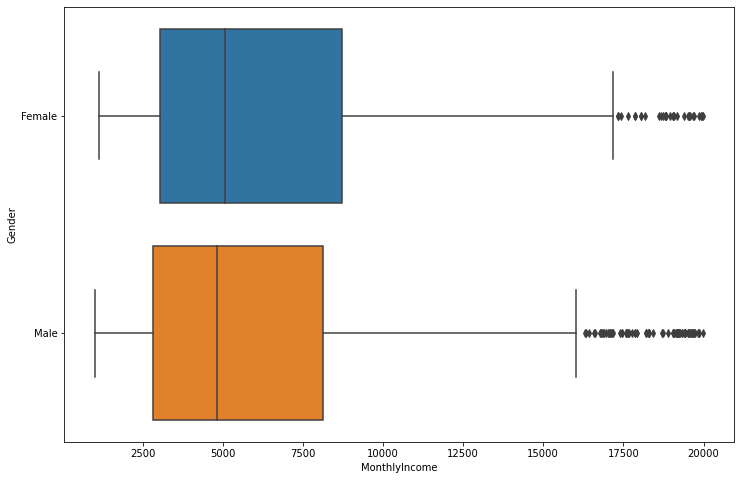

In [30]:
mpl.figure(figsize=(12,8))
sb.boxplot(x='MonthlyIncome', y='Gender', data= df)

### Box Plots w.r.t "MonthlyIncome" and "JobRole"

<AxesSubplot:xlabel='MonthlyIncome', ylabel='JobRole'>

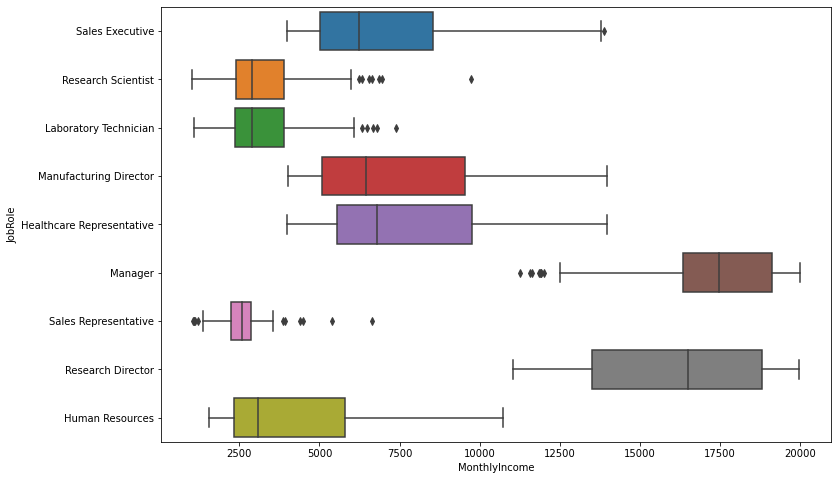

In [31]:
mpl.figure(figsize=(12,8))
sb.boxplot(x='MonthlyIncome', y='JobRole', data = df)

# Label Encoder()

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [33]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [34]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole  

## Converting Categorical to Numeric using Label Encoder()

In [35]:
df["Attrition"] = le.fit_transform(df["Attrition"])
df["BusinessTravel"] = le.fit_transform(df["BusinessTravel"])
df["Department"] = le.fit_transform(df["Department"])
df["EducationField"] = le.fit_transform(df["EducationField"])
df["Gender"] = le.fit_transform(df["Gender"])
df["JobRole"] = le.fit_transform(df["JobRole"])
df["OverTime"] = le.fit_transform(df["OverTime"])
df["MaritalStatus"] = le.fit_transform(df["MaritalStatus"])

In [36]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2


# Correlation Between Each Columns

In [37]:
df.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,0.010146,-0.036311,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,-0.103369,0.029453,...,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,0.004174,-0.032981,...,-0.026341,-0.035986,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,0.018355,-0.011716,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,-0.019395,-0.041583,...,-0.024604,-0.022414,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,-0.016075,-0.001851,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,-0.027128,-0.016547,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,0.043163,-0.002504,...,-0.005614,-0.004378,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EnvironmentSatisfaction,0.010146,-0.103369,0.004174,0.018355,-0.019395,-0.016075,-0.027128,0.043163,1.000000,0.000508,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
Gender,-0.036311,0.029453,-0.032981,-0.011716,-0.041583,-0.001851,-0.016547,-0.002504,0.000508,1.000000,...,-0.013859,0.022868,0.012716,-0.046881,-0.038787,-0.002753,-0.029747,-0.041483,-0.026985,-0.030599


<AxesSubplot:>

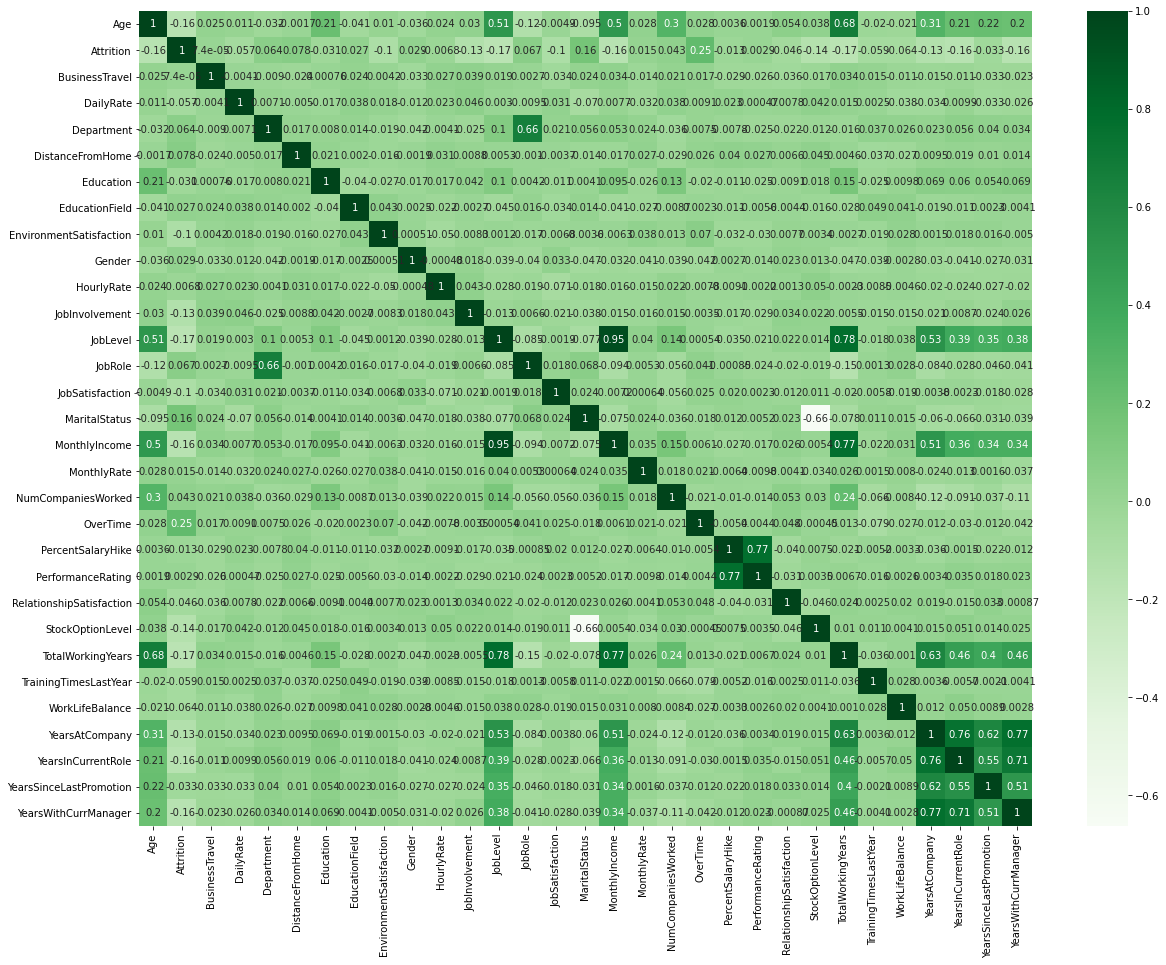

In [38]:
# Heatmapping

mpl.figure(figsize = (20,15))
sb.heatmap(df.corr(),cmap='Greens',annot=True)

In [39]:
df.dtypes

Age                         int64
Attrition                   int32
BusinessTravel              int32
DailyRate                   int64
Department                  int32
DistanceFromHome            int64
Education                   int64
EducationField              int32
EnvironmentSatisfaction     int64
Gender                      int32
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int32
JobSatisfaction             int64
MaritalStatus               int32
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
OverTime                    int32
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLast

# Feature Importance

## Identifying X and Y Values

In [40]:
x = df.drop('Attrition', axis=1)
y = df["Attrition"]
x,y

(      Age  BusinessTravel  DailyRate  Department  DistanceFromHome  Education  \
 0      41               2       1102           2                 1          2   
 1      49               1        279           1                 8          1   
 2      37               2       1373           1                 2          2   
 3      33               1       1392           1                 3          4   
 4      27               2        591           1                 2          1   
 ...   ...             ...        ...         ...               ...        ...   
 1465   36               1        884           1                23          2   
 1466   39               2        613           1                 6          1   
 1467   27               2        155           1                 4          3   
 1468   49               1       1023           2                 2          3   
 1469   34               2        628           1                 8          3   
 
       Educati

In [41]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [42]:
model.feature_importances_

array([0.04541477, 0.02395288, 0.03190264, 0.02763492, 0.03977174,
       0.02582131, 0.0294433 , 0.04148466, 0.02145206, 0.02789703,
       0.03511136, 0.04966775, 0.03564441, 0.03907129, 0.04091615,
       0.0417658 , 0.02471441, 0.03448734, 0.06057407, 0.02449006,
       0.00989107, 0.0342236 , 0.03185757, 0.03698312, 0.02996433,
       0.04166108, 0.03026433, 0.026321  , 0.02795533, 0.02966062])

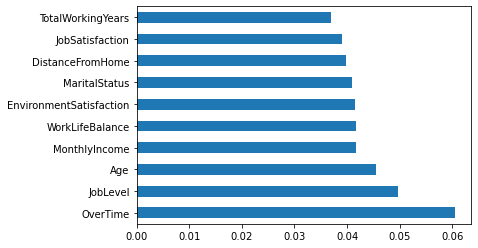

In [43]:
feat_imp = pd.Series(model.feature_importances_, index=x.columns)
feat_imp.nlargest(10).plot(kind='barh')
mpl.show()

# Splitting the Dataset into training and test

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state = 15)

In [45]:
x_train.shape

(1102, 30)

In [46]:
x_test.shape

(368, 30)

# Feature Scaling

The main purpose of this scales are to rescale the values of independent variables or features in the same data so that in the obtained distribution every point or value is close to each other.

We are having 2 Feature Scaling Process

1) Normalization:
it helps to scale down features of data between 0 to 1
range : 0 to 1,
Xnorm = (X-Xmin) / (Xmax-Xmin),
MinMaxScaler()

2) Standardization:
it helps to scale down the features of data based on standard and normal distribution curve with mean=0 & standard deviation=1

range: bell curve,
Xstand = (X-mean) / (sd) StandardScaler() also called as Z-Score Normalization

from sklearn.preprocessing import StandardScaler sc = StandardScaler() x_train = sc.fit_transform(x_train) x_test = sc.fit_transform(x_test)

In [47]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

# Evaluating The Models

In [48]:
# Importing Models

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

## LogisticRegression

Accuracy_Score = 0.8641304347826086

              precision    recall  f1-score   support

           0       0.90      0.95      0.92       314
           1       0.56      0.37      0.44        54

    accuracy                           0.86       368
   macro avg       0.73      0.66      0.68       368
weighted avg       0.85      0.86      0.85       368



<AxesSubplot:>

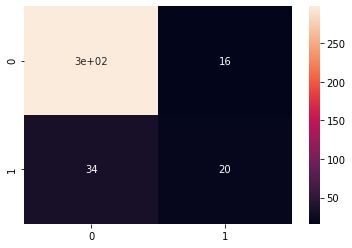

In [49]:
# Model Fitting
lor = LogisticRegression().fit(x_train,y_train)

# Prediction
y_pred = lor.predict(x_test)
y_pred

# Accuracy_Score
acc_score1 = accuracy_score(y_test,y_pred)
print('Accuracy_Score =',acc_score1)
print()

# Confusion Matrix
cm = confusion_matrix(y_test,y_pred)
cm

# classification_report
print(classification_report(y_test,y_pred))

# Heat Mapping
sb.heatmap(cm,annot = True)

## DecisionTreeClassifier

Accuracy_Score = 0.8097826086956522

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       314
           1       0.35      0.33      0.34        54

    accuracy                           0.81       368
   macro avg       0.62      0.61      0.61       368
weighted avg       0.81      0.81      0.81       368



<AxesSubplot:>

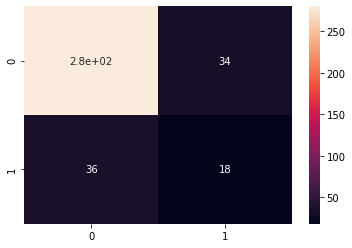

In [50]:
# Model Fitting
dtc = DecisionTreeClassifier(random_state=15).fit(x_train,y_train)

# Prediction
y_pred = dtc.predict(x_test)
y_pred

# Accuracy_Score
acc_score2 = accuracy_score(y_test,y_pred)
print('Accuracy_Score =',acc_score2)
print()

# Confusion Matrix
cm = confusion_matrix(y_test,y_pred)
cm

# classification_report
print(classification_report(y_test,y_pred))

# Heat Mapping
sb.heatmap(cm,annot = True)

## RandomForestClassifier

Accuracy_Score = 0.8614130434782609

              precision    recall  f1-score   support

           0       0.87      0.99      0.92       314
           1       0.67      0.11      0.19        54

    accuracy                           0.86       368
   macro avg       0.77      0.55      0.56       368
weighted avg       0.84      0.86      0.82       368



<AxesSubplot:>

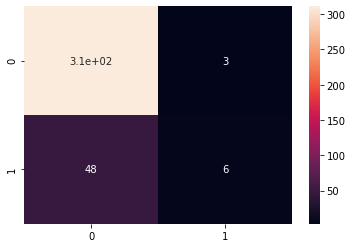

In [51]:
# Model Fitting
rfc = RandomForestClassifier(random_state=15,verbose=False).fit(x_train,y_train)

# Prediction
y_pred = rfc.predict(x_test)
y_pred

# Accuracy_Score
acc_score3 = accuracy_score(y_pred,y_test)
print('Accuracy_Score =',acc_score3)
print()

# Confusion Matrix
cm = confusion_matrix(y_test,y_pred)
cm

# classification_report
print(classification_report(y_test,y_pred))

# Heat Mapping
sb.heatmap(cm,annot = True)

## KNeighborsClassifier

Accuracy_Score = 0.8369565217391305

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       314
           1       0.29      0.07      0.12        54

    accuracy                           0.84       368
   macro avg       0.57      0.52      0.51       368
weighted avg       0.77      0.84      0.79       368



<AxesSubplot:>

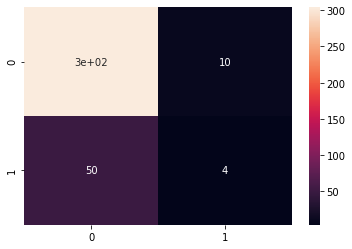

In [52]:
# Model Fitting
knnc = KNeighborsClassifier().fit(x_train,y_train)

# Prediction
y_pred = knnc.predict(x_test)
y_pred

# Accuracy_Score
acc_score4 = accuracy_score(y_test,y_pred)
print('Accuracy_Score =',acc_score4)
print()

# Confusion Matrix
cm = confusion_matrix(y_test,y_pred)
cm

# classification_report
print(classification_report(y_test,y_pred))

# Heat Mapping
sb.heatmap(cm,annot = True)

## SupportVectorClassifier

Accuracy_Score = 0.8532608695652174

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       314
           1       0.50      0.11      0.18        54

    accuracy                           0.85       368
   macro avg       0.68      0.55      0.55       368
weighted avg       0.81      0.85      0.81       368



<AxesSubplot:>

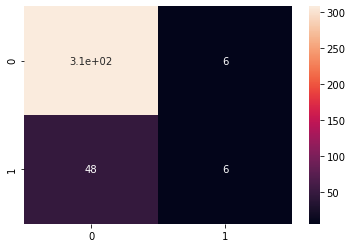

In [53]:
# Model Fitting
svc = SVC().fit(x_train,y_train)

# Prediction
y_pred = svc.predict(x_test)
y_pred

# Accuracy_Score
acc_score5 = accuracy_score(y_test,y_pred)
print('Accuracy_Score =',acc_score5)
print()

# Confusion Matrix
cm = confusion_matrix(y_test,y_pred)
cm

# classification_report
print(classification_report(y_test,y_pred))

# Heat Mapping
sb.heatmap(cm,annot = True)

## naive_bayes Classifier_GaussianNB

Accuracy_Score = 0.7336956521739131

              precision    recall  f1-score   support

           0       0.92      0.75      0.83       314
           1       0.30      0.61      0.40        54

    accuracy                           0.73       368
   macro avg       0.61      0.68      0.62       368
weighted avg       0.83      0.73      0.77       368



<AxesSubplot:>

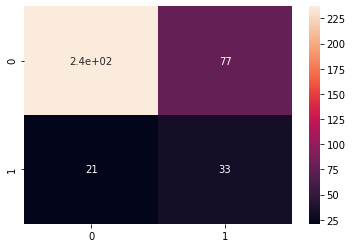

In [54]:
# Model Fitting
gnb = GaussianNB().fit(x_train,y_train)

# Prediction
y_pred = gnb.predict(x_test)
y_pred

# Accuracy_Score
acc_score6 = accuracy_score(y_test,y_pred)
print('Accuracy_Score =',acc_score6)
print()

# Confusion Matrix
cm = confusion_matrix(y_test,y_pred)
cm

# classification_report
print(classification_report(y_test,y_pred))

# Heat Mapping
sb.heatmap(cm,annot = True)

# DataFrame For All Classification Models & Accuracy Score

In [55]:
pd.DataFrame({'Name Of The Model':['LOR','DTC','RFC','KNNC','SVC','GNB'],'Accuracy Score':
               [acc_score1,acc_score2,acc_score3,acc_score4,acc_score5,acc_score6]})

,Name Of The Model,Accuracy Score
0,LOR,0.864130
1,DTC,0.809783
2,RFC,0.861413
3,KNNC,0.836957
4,SVC,0.853261
5,GNB,0.733696


# Hyperparameter Tuning

## SVM using Hyperparameter Tuning

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [57]:
svc  = SVC()

parameters = {"kernel":['linear', 'poly', 'rbf'], 
             'C':[0.001,0.01,0.1,1,10], 'degree':[1,2,3,4,5,6,7], 
              'gamma':[0.001,0.1,1,2,5,10,100]}

gv = GridSearchCV(svc, parameters, cv=5, scoring='accuracy')
gv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'degree': [1, 2, 3, 4, 5, 6, 7],
                         'gamma': [0.001, 0.1, 1, 2, 5, 10, 100],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring='accuracy')

In [58]:
gv.best_params_

{'C': 0.1, 'degree': 1, 'gamma': 100, 'kernel': 'poly'}

In [66]:
svc  = SVC(kernel='poly', C= 0.1, degree= 1, gamma= 100)

In [67]:
svc.fit(x_train,y_train)

SVC(C=0.1, degree=1, gamma=100, kernel='poly')

In [68]:
y_pred = svc.predict(x_test)

In [69]:
asvm = accuracy_score(y_pred, y_test)

In [70]:
asvm

0.8668478260869565

## KNeighborsClassifier 

In [74]:
knnc  = KNeighborsClassifier()

parameters = { 'n_neighbors': range(1,21,2),
              'weights':['uniform', 'distance'], 
              'metric':['euclidean','manhattan','minkowski'],
              'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']
             }

gv = GridSearchCV(knnc, parameters, cv=5, scoring='accuracy')
gv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': range(1, 21, 2),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [75]:
gv.best_params_

{'algorithm': 'auto',
 'metric': 'manhattan',
 'n_neighbors': 5,
 'weights': 'uniform'}

In [77]:
knnc  = KNeighborsClassifier(algorithm = 'auto', metric = 'manhattan',n_neighbors = 5, weights = 'uniform')

In [78]:
knnc.fit(x_train,y_train)

KNeighborsClassifier(metric='manhattan')

In [79]:
y_pred = knnc.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [80]:
aknnc = accuracy_score(y_pred, y_test)
aknnc

0.8532608695652174

## RandomForestClassifier

In [89]:
rtc  = RandomForestClassifier()

parameters = { 'n_estimators':[1,10,100,1000],
              'max_features':['sqrt', 'log2',"auto"], 
              'criterion':["gini", "entropy"]
             }

gv = GridSearchCV(rtc, parameters, cv=5, scoring='accuracy')
gv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['sqrt', 'log2', 'auto'],
                         'n_estimators': [1, 10, 100, 1000]},
             scoring='accuracy')

In [90]:
gv.best_params_

{'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 1000}

In [95]:
rtc  = RandomForestClassifier(criterion = 'gini', max_features = 'sqrt', n_estimators = 1000)

In [96]:
rtc.fit(x_train,y_train)

RandomForestClassifier(max_features='sqrt', n_estimators=1000)

In [97]:
y_pred = rtc.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [98]:
artc = accuracy_score(y_pred, y_test)
artc

0.8614130434782609

## LogisticRegression

In [99]:
lor = LogisticRegression()

parameters = { 'multi_class':['auto', 'ovr', 'multinomial'],
              'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 
              'penalty':['l1', 'l2', 'elasticnet']
             }

gv = GridSearchCV(lor, parameters, cv=5, scoring='accuracy')
gv.fit(x_train,y_train)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_va

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selec

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1348, in fit
    multi_class = _check_multi_class(self.multi_class, solver,
  File "C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 472, in _check_multi_class
    raise ValueError("Solver %s does not support "
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: E

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [100]:
gv.best_params_

{'multi_class': 'auto', 'penalty': 'l1', 'solver': 'liblinear'}

In [101]:
lor  = LogisticRegression(multi_class = 'auto', penalty = 'l1', solver = 'liblinear')

In [102]:
lor.fit(x_train,y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [103]:
y_pred = lor.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,

In [104]:
alor = accuracy_score(y_pred, y_test)
alor

0.8668478260869565

## DecisionTreeClassifier

In [122]:
dtc = DecisionTreeClassifier()

parameters = { 'splitter':["best", "random"],
              'criterion':['entropy', 'gini'], 
             }

gv = GridSearchCV(dtc, parameters, cv=10, scoring='accuracy')
gv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [123]:
gv.best_params_

{'criterion': 'entropy', 'splitter': 'best'}

In [124]:
dtc  = DecisionTreeClassifier(criterion = 'entropy', splitter = 'best')

In [125]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [126]:
y_pred = dtc.predict(x_test)
y_pred

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,

In [127]:
adtc = accuracy_score(y_pred, y_test)
adtc

0.7744565217391305

# Deep Learning Model - ANN(Artificial Nural Network)

In [59]:
import tensorflow as tf

In [60]:
pip install Keras

Note: you may need to restart the kernel to use updated packages.


In [61]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [62]:
# Initialising the ANN
classifier = Sequential()

In [63]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))


In [64]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [65]:
# Fitting the ANN to the Training set
classifier.fit(x_train, y_train, batch_size = 10, epochs = 150)

Epoch 1/150
111/111 [==============================] - 0s 2ms/step - loss: 0.6632 - accuracy: 0.8285
Epoch 2/150
111/111 [==============================] - 0s 1ms/step - loss: 0.5057 - accuracy: 0.8339
Epoch 3/150
111/111 [==============================] - 0s 1ms/step - loss: 0.4003 - accuracy: 0.8339
Epoch 4/150
111/111 [==============================] - 0s 1ms/step - loss: 0.3758 - accuracy: 0.8339
Epoch 5/150
111/111 [==============================] - 0s 1ms/step - loss: 0.3628 - accuracy: 0.8339
Epoch 6/150
111/111 [==============================] - 0s 1ms/step - loss: 0.3546 - accuracy: 0.8339
Epoch 7/150
111/111 [==============================] - 0s 1ms/step - loss: 0.3472 - accuracy: 0.8339
Epoch 8/150
111/111 [==============================] - 0s 1ms/step - loss: 0.3422 - accuracy: 0.8339
Epoch 9/150
111/111 [==============================] - 0s 1ms/step - loss: 0.3384 - accuracy: 0.8339
Epoch 10/150
111/111 [==============================] - 0s 2ms/step - loss: 0.3347 - accura

111/111 [==============================] - 0s 3ms/step - loss: 0.2541 - accuracy: 0.9074
Epoch 82/150
111/111 [==============================] - 0s 2ms/step - loss: 0.2528 - accuracy: 0.9111
Epoch 83/150
111/111 [==============================] - 0s 1ms/step - loss: 0.2513 - accuracy: 0.9156
Epoch 84/150
111/111 [==============================] - 0s 2ms/step - loss: 0.2515 - accuracy: 0.9074
Epoch 85/150
111/111 [==============================] - 0s 2ms/step - loss: 0.2505 - accuracy: 0.9129
Epoch 86/150
111/111 [==============================] - 0s 1ms/step - loss: 0.2497 - accuracy: 0.9129
Epoch 87/150
111/111 [==============================] - 0s 1ms/step - loss: 0.2490 - accuracy: 0.9129
Epoch 88/150
111/111 [==============================] - 0s 2ms/step - loss: 0.2484 - accuracy: 0.9120
Epoch 89/150
111/111 [==============================] - 0s 1ms/step - loss: 0.2471 - accuracy: 0.9111
Epoch 90/150
111/111 [==============================] - 0s 1ms/step - loss: 0.2461 - accuracy: 